In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../artifacts/data_ingestion/data.csv')

In [3]:
data.head(20)

,gender_id,risk_apetite,address_city,address_country,fraud_score,monthly_expense,monthly_salary,type,last_transaction_date,inactivity_days,total_transactions,total_transaction_amount,total_withdrawn_amount
0,1.0,2,NaN,NaN,0,1.000000e+06,1.000000e+07,Investment,2022-03-01 17:42:45,1184,1,3.000000e+04,0.0
1,1.0,0,Apa,NaN,0,0.000000e+00,0.000000e+00,Savings,2025-01-16 09:25:12,132,1,1.000000e+05,0.0
2,2.0,0,NaN,NaN,0,0.000000e+00,0.000000e+00,Savings,2024-08-28 00:33:49,273,10,7.000000e+06,0.0
3,2.0,0,NaN,NaN,0,0.000000e+00,0.000000e+00,Savings,2023-08-24 21:49:07,643,1,1.000000e+06,0.0
4,2.0,1,NaN,NaN,0,4.000000e+07,1.500000e+08,Savings,2024-08-17 00:32:08,284,52,2.450100e+08,0.0
5,NaN,0,NaN,NaN,0,0.000000e+00,0.000000e+00,Investment,2024-12-16 22:20:07,163,1,2.000000e+06,0.0
6,NaN,0,NaN,NaN,0,0.000000e+00,0.000000e+00,Savings,2021-03-24 16:43:53,1526,2,2.000100e+08,0.0
7,NaN,0,NaN,NaN,0,0.000000e+00,0.000000e+00,Investment,2025-02-11 13:40:44,106,2,1.000000e+07,0.0
8,2.0,2,Ikeja,NaN,0,4.000000e+07,7.500000e+07,Savings,2021-04-01 23:20:04,1518,13,7.300000e+05,0.0
9,NaN,2,"Lahore, Punjab",Pakistan,0,1.000000e+09,2.000000e+09,Investment,2020-10-30 11:04:49,1671,2,2.032842e+06,0.0


In [4]:
dtypes_dict = data.dtypes.apply(lambda x: x.name).to_dict()


In [5]:
dtypes_dict

{'gender_id': 'float64',
 'risk_apetite': 'int64',
 'address_city': 'object',
 'address_country': 'object',
 'fraud_score': 'int64',
 'monthly_expense': 'float64',
 'monthly_salary': 'float64',
 'type': 'object',
 'last_transaction_date': 'object',
 'inactivity_days': 'int64',
 'total_transactions': 'int64',
 'total_transaction_amount': 'float64',
 'total_withdrawn_amount': 'float64'}

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender_id                 2332 non-null   float64
 1   risk_apetite              2818 non-null   int64  
 2   address_city              1492 non-null   object 
 3   address_country           811 non-null    object 
 4   fraud_score               2818 non-null   int64  
 5   monthly_expense           2818 non-null   float64
 6   monthly_salary            2818 non-null   float64
 7   type                      2818 non-null   object 
 8   last_transaction_date     2818 non-null   object 
 9   inactivity_days           2818 non-null   int64  
 10  total_transactions        2818 non-null   int64  
 11  total_transaction_amount  2818 non-null   float64
 12  total_withdrawn_amount    2818 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 286.3+ KB


In [6]:
data.isnull().sum()/len(data)*100

gender_id                   17.246274
risk_apetite                 0.000000
address_city                47.054649
address_country             71.220724
fraud_score                  0.000000
monthly_expense              0.000000
monthly_salary               0.000000
type                         0.000000
last_transaction_date        0.000000
inactivity_days              0.000000
total_transactions           0.000000
total_transaction_amount     0.000000
total_withdrawn_amount       0.000000
dtype: float64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# create target variable
In this study, we assume any plan without transaction for more than 365 day is more likely to be abandoned.

In [11]:
data["plan_abondonment"] = data["inactivity_days"].apply(
    lambda x: "abondoned" if x >= 365 else "non-abondoned"
)

/tmp/ipykernel_24130/2766001592.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(0, 0.5, 'Count')

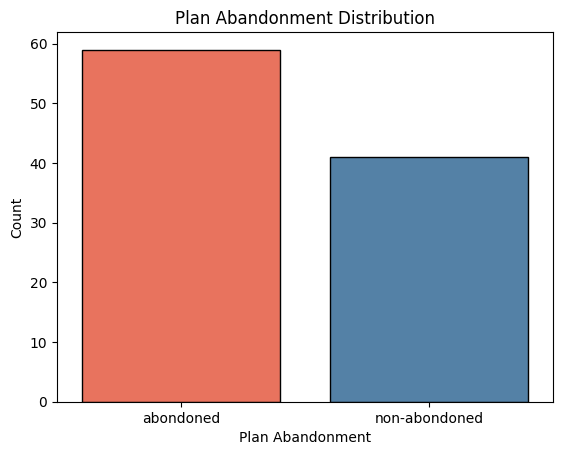

In [16]:
sns.countplot(
    x="plan_abondonment",
    data=data,
    palette=["#FF6347", "#4682B4"],
    edgecolor="black",
    stat="percent"
    
)
plt.title("Plan Abandonment Distribution")
plt.xlabel("Plan Abandonment")
plt.ylabel("Count")


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender_id                 2332 non-null   float64
 1   risk_apetite              2818 non-null   int64  
 2   address_city              1492 non-null   object 
 3   address_country           811 non-null    object 
 4   fraud_score               2818 non-null   int64  
 5   monthly_expense           2818 non-null   float64
 6   monthly_salary            2818 non-null   float64
 7   type                      2818 non-null   object 
 8   last_transaction_date     2818 non-null   object 
 9   inactivity_days           2818 non-null   int64  
 10  total_transactions        2818 non-null   int64  
 11  total_transaction_amount  2818 non-null   float64
 12  total_withdrawn_amount    2818 non-null   float64
 13  plan_abonnement           2818 non-null   object 
 14  plan_abo

# Plan Abandonment vs gender

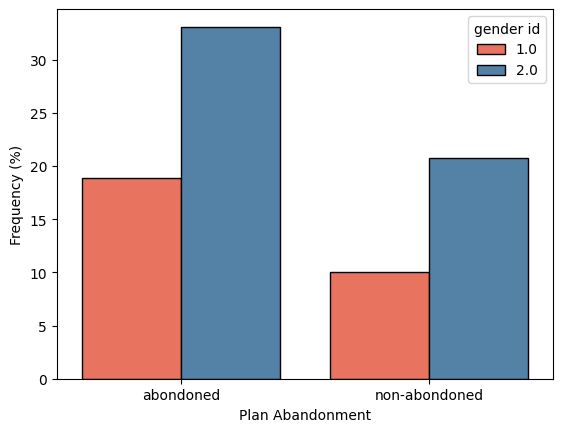

In [21]:
sns.countplot(
    x="plan_abondonment",
    data=data,
    palette=["#FF6347", "#4682B4"],
    edgecolor="black",
    stat="percent",
    hue="gender_id")
plt.xlabel("Plan Abandonment")
plt.ylabel("Frequency (%)")
plt.legend(title = "gender id")
plt.show()

# Numerical data

In [28]:
# Select numerical columns only
num_data = data.select_dtypes(include=['int64', 'float64'])
num_data.drop(columns=['gender_id'], inplace=True)

In [56]:
data.dtypes

gender_id                   float64
risk_apetite                  int64
address_city                 object
address_country              object
fraud_score                   int64
monthly_expense             float64
monthly_salary              float64
type                         object
last_transaction_date        object
inactivity_days               int64
total_transactions            int64
total_transaction_amount    float64
total_withdrawn_amount      float64
dtype: object

In [29]:
# Display summary statistics
num_data.describe().T


,count,mean,std,min,25%,50%,75%,max
risk_apetite,2818.0,1.397090e+00,1.245034e+00,0.0,0.0,2.0,2.0,3.000000e+00
fraud_score,2818.0,2.936480e+00,5.783505e+00,0.0,0.0,0.0,0.0,5.000000e+01
monthly_expense,2818.0,2.576219e+07,9.020558e+07,0.0,0.0,0.0,15000000.0,1.000000e+09
monthly_salary,2818.0,3.792960e+07,1.235941e+08,0.0,0.0,80000.0,57500000.0,2.000000e+09
inactivity_days,2818.0,8.478783e+02,7.321494e+02,40.0,267.0,592.0,1383.0,3.174000e+03
total_transactions,2818.0,2.465259e+01,6.683354e+01,1.0,1.0,2.5,16.0,8.470000e+02
total_transaction_amount,2818.0,8.763932e+07,5.300039e+08,0.0,612500.0,4005000.0,24000000.0,1.250840e+10
total_withdrawn_amount,2818.0,7.527511e+07,2.389410e+09,0.0,0.0,0.0,0.0,1.145136e+11


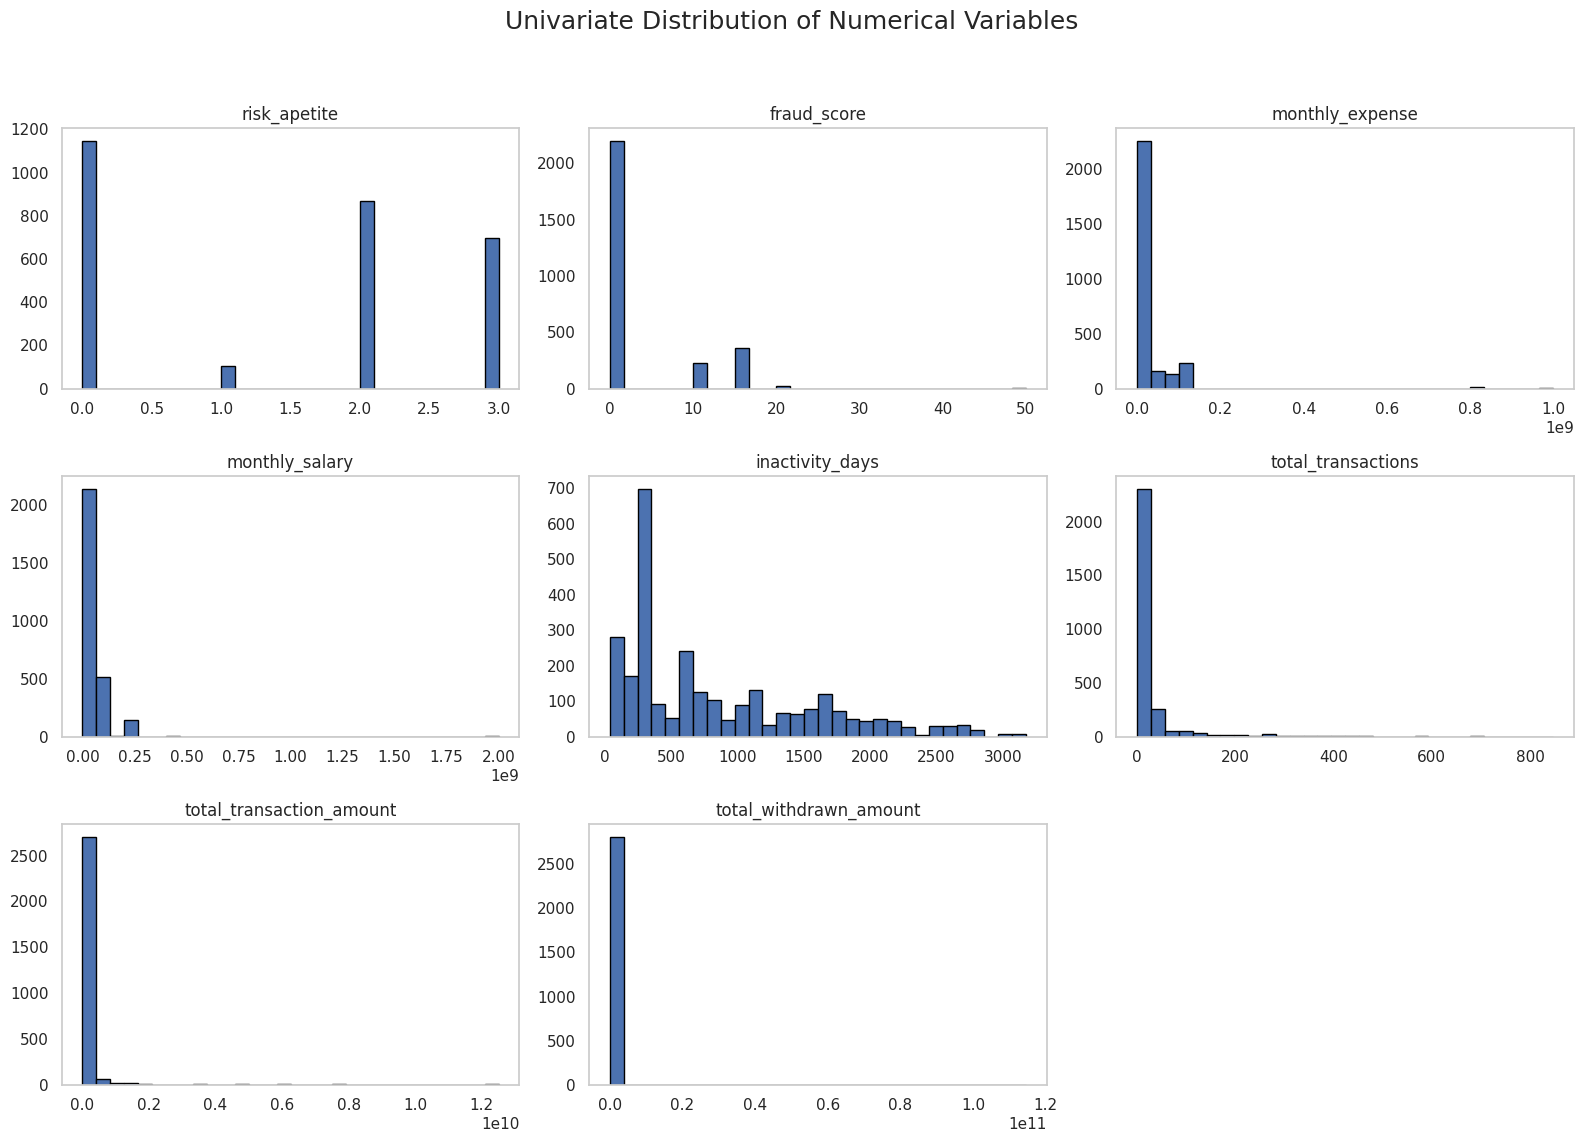

In [30]:
# Set plot style
sns.set(style="whitegrid")

# Plot histograms with KDE for each numerical feature
num_data.hist(bins=30, figsize=(16, 12), edgecolor='black', grid=False)
plt.suptitle('Univariate Distribution of Numerical Variables', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Outliers

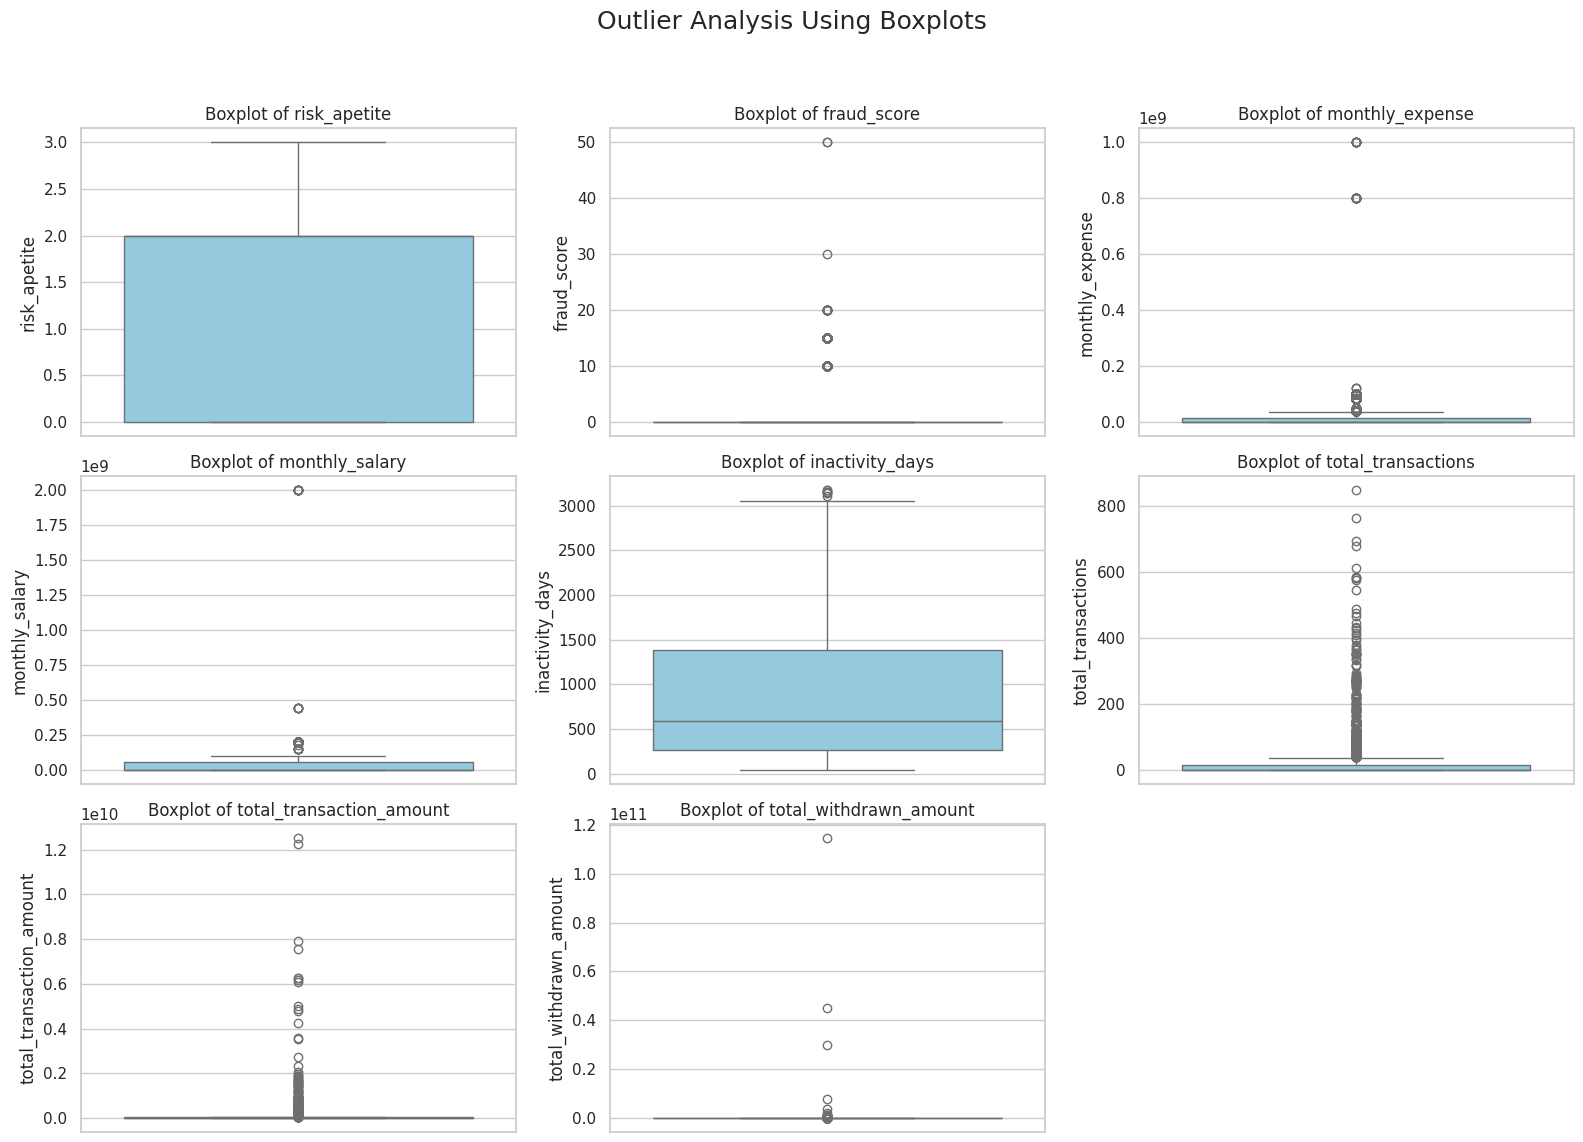

In [31]:
# Boxplots for outlier detection
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=num_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.suptitle('Outlier Analysis Using Boxplots', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Correlation

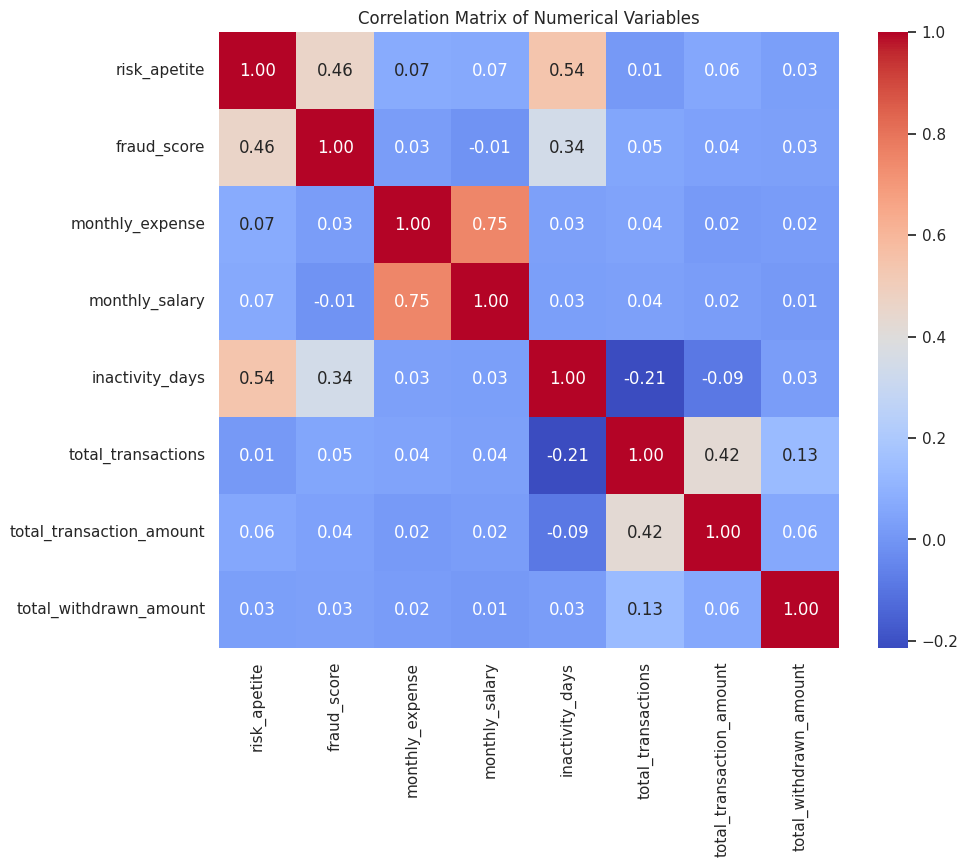

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


# Pairplot

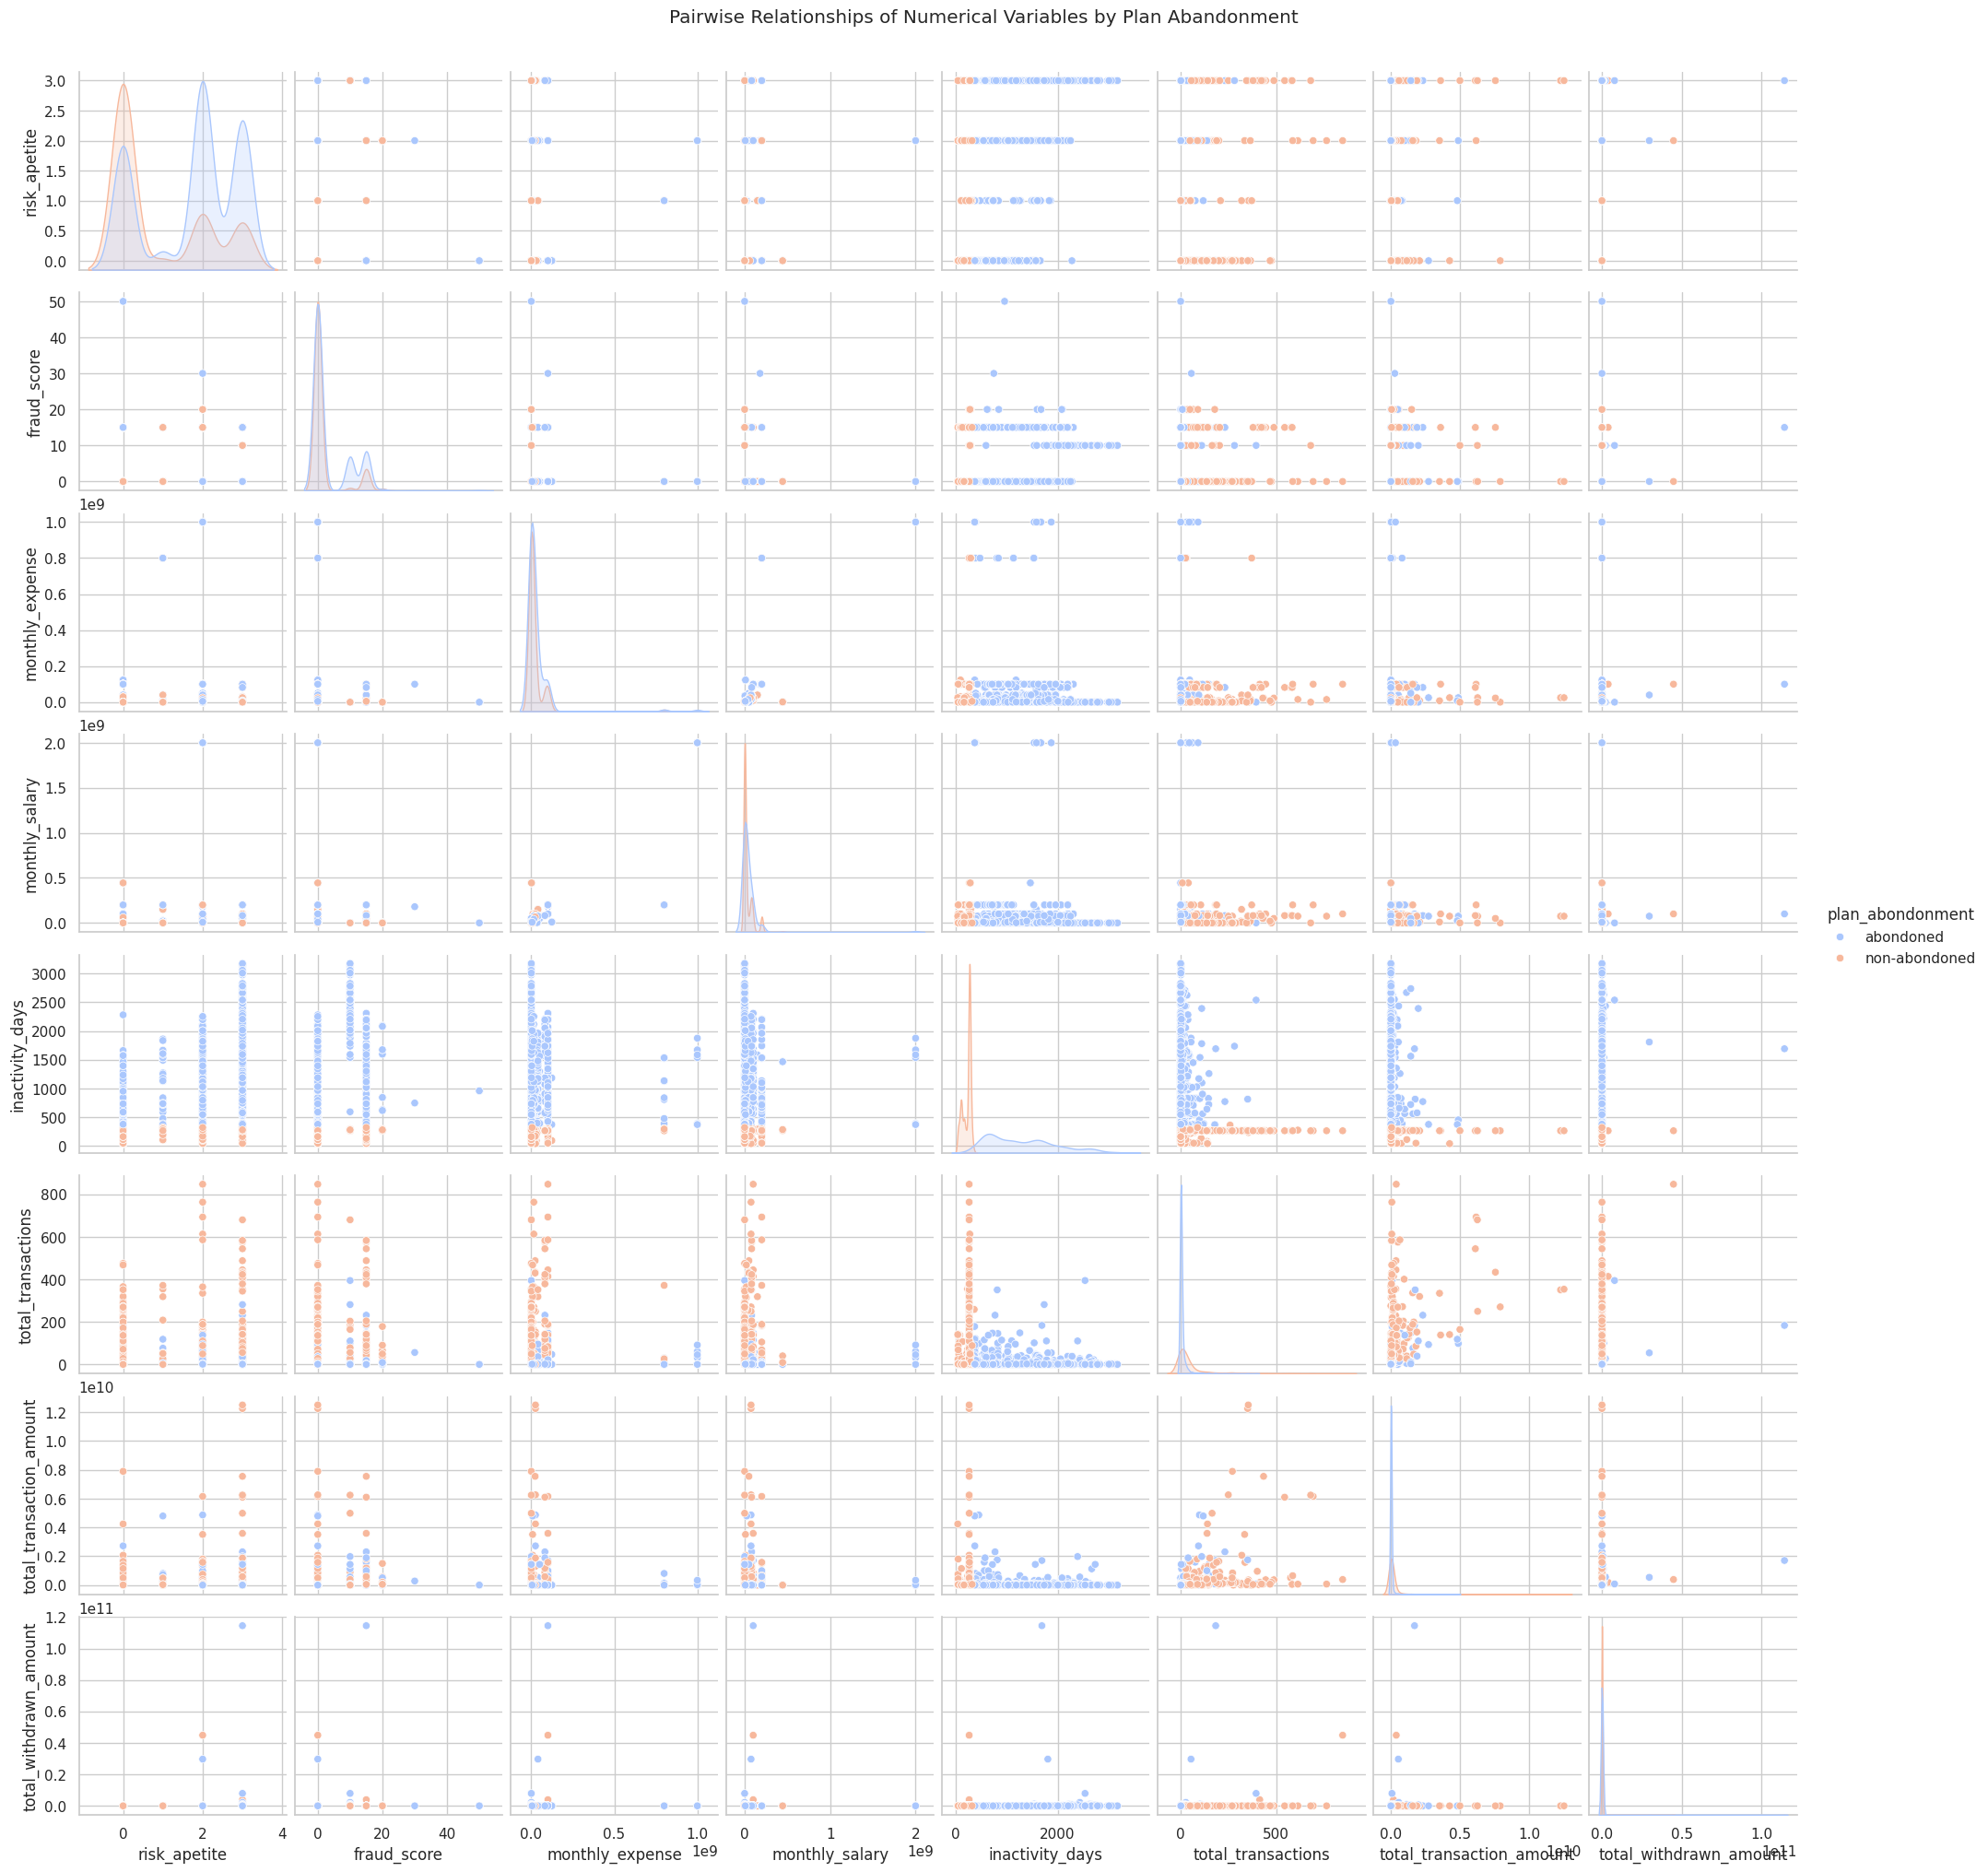

In [41]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove("gender_id")
# Pairplot with hue as a categorical variable
sns.pairplot(
    data[numerical_columns + ['plan_abondonment']],
    diag_kind='kde',
    hue='plan_abondonment',
    markers='o',
    palette='coolwarm'
)
plt.suptitle("Pairwise Relationships of Numerical Variables by Plan Abandonment", y=1.02)
plt.show()

# Drop colunm with more than 30% null vlaues from data

In [43]:
columns_to_keep = []
for col in data.columns:
    nan_percentatge = data[col].isnull().sum() / len(data) * 100
    if nan_percentatge < 40:
        columns_to_keep.append(col) 


In [44]:
columns_to_keep

['gender_id',
 'risk_apetite',
 'fraud_score',
 'monthly_expense',
 'monthly_salary',
 'type',
 'last_transaction_date',
 'inactivity_days',
 'total_transactions',
 'total_transaction_amount',
 'total_withdrawn_amount',
 'plan_abonnement',
 'plan_abondonment']

In [45]:
data[columns_to_keep].isnull().sum() / len(data) * 100

gender_id                   17.246274
risk_apetite                 0.000000
fraud_score                  0.000000
monthly_expense              0.000000
monthly_salary               0.000000
type                         0.000000
last_transaction_date        0.000000
inactivity_days              0.000000
total_transactions           0.000000
total_transaction_amount     0.000000
total_withdrawn_amount       0.000000
plan_abonnement              0.000000
plan_abondonment             0.000000
dtype: float64

In [46]:
data1 = data[columns_to_keep]

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender_id                 2332 non-null   float64
 1   risk_apetite              2818 non-null   int64  
 2   fraud_score               2818 non-null   int64  
 3   monthly_expense           2818 non-null   float64
 4   monthly_salary            2818 non-null   float64
 5   type                      2818 non-null   object 
 6   last_transaction_date     2818 non-null   object 
 7   inactivity_days           2818 non-null   int64  
 8   total_transactions        2818 non-null   int64  
 9   total_transaction_amount  2818 non-null   float64
 10  total_withdrawn_amount    2818 non-null   float64
 11  plan_abonnement           2818 non-null   object 
 12  plan_abondonment          2818 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 286.3+ KB


In [48]:
data1.isnull().sum() / len(data1) * 100

gender_id                   17.246274
risk_apetite                 0.000000
fraud_score                  0.000000
monthly_expense              0.000000
monthly_salary               0.000000
type                         0.000000
last_transaction_date        0.000000
inactivity_days              0.000000
total_transactions           0.000000
total_transaction_amount     0.000000
total_withdrawn_amount       0.000000
plan_abonnement              0.000000
plan_abondonment             0.000000
dtype: float64